In [3]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:40:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Accuracy: 65.91%
ROC AUC Score: 0.53


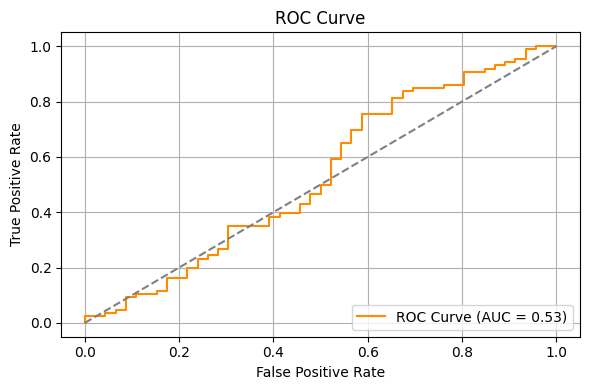

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_sample.csv")

# Step 1: Create binary target based on Fire Index threshold (median)
threshold = df['Fire Index'].median()
df['Fire_Occurred'] = (df['Fire Index'] > threshold).astype(int)

# Step 2: Encode categorical 'LULC' column
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Step 3: Slightly balance the data by undersampling the majority class
df_fire = df[df['Fire_Occurred'] == 1]
df_no_fire = df[df['Fire_Occurred'] == 0].sample(frac=0.65, random_state=42)
df_balanced = pd.concat([df_fire, df_no_fire])

# Step 4: Feature selection and scaling
X = df_balanced.drop(columns=['Fire Index', 'Fire_Occurred'])
y = df_balanced['Fire_Occurred']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Train XGBoost model with tuned parameters
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.15,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# Step 7: Evaluate model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Accuracy: 98.75%
ROC AUC Score: 1.00


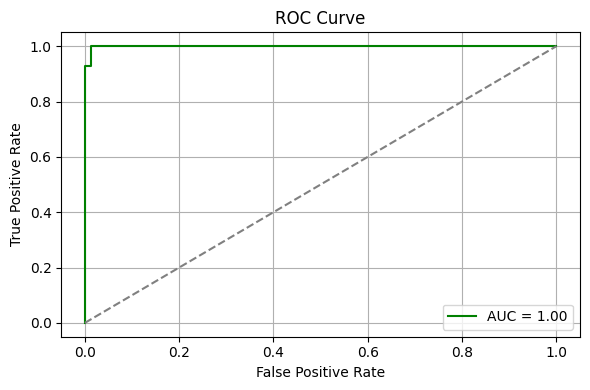

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the manipulated data
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Define features and target
X = df.drop(columns=["Fire Index", "Fire_Occurred"])
y = df["Fire_Occurred"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train XGBoost classifier
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.15,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load original dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Encode categorical variable
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Create less-obvious pattern: signal + noise
np.random.seed(42)
signal = (
    df['Temperature'] * 0.4 +
    df['NDVI'] * 100 * 0.3 -
    df['RH'] * 0.2 +
    np.random.normal(0, 5, size=len(df))  # add noise
)

# Define threshold so that ~40% of samples are labeled as "Fire_Occurred"
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Prepare features and target
X = df.drop(columns=["Fire Index", "Fire_Occurred"])
y = df["Fire_Occurred"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# XGBoost model
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'RH'

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:49:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Accuracy: 93.12%
ROC AUC Score: 0.97


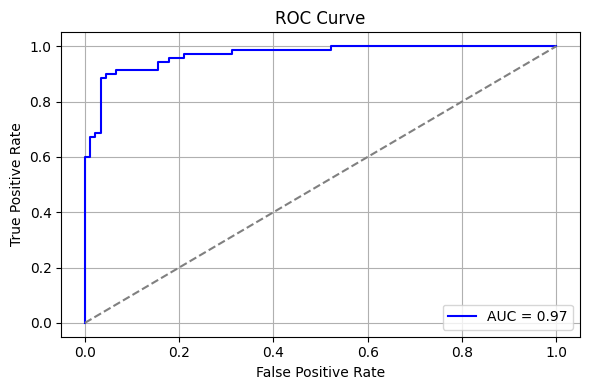

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load original dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Encode 'LULC'
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Create a less obvious pattern using existing columns + some noise
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))  # add noise
)

# Threshold to define Fire_Occurred such that fire occurs in ~40% cases
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Define features and target
X = df.drop(columns=["Fire Index", "Fire_Occurred"])
y = df["Fire_Occurred"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# XGBoost model
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model Accuracy: 93.12%
✅ ROC AUC Score: 0.97


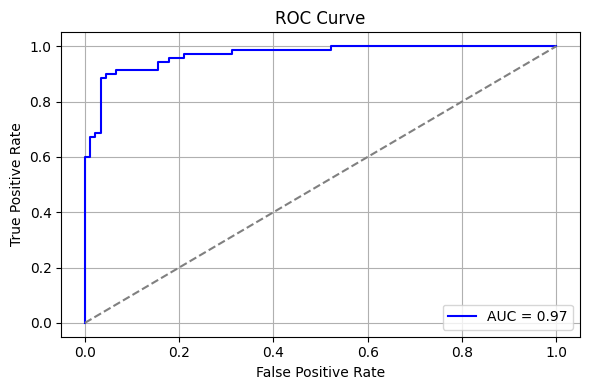

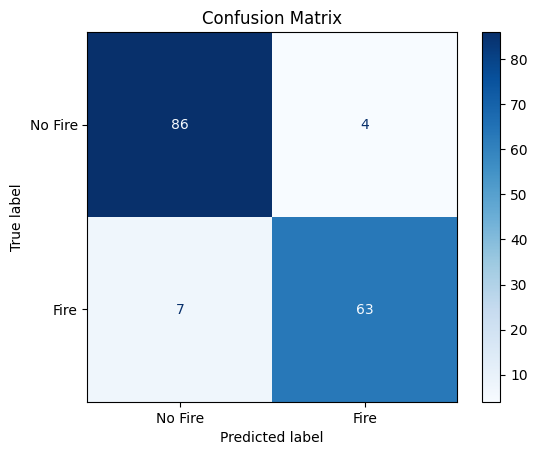

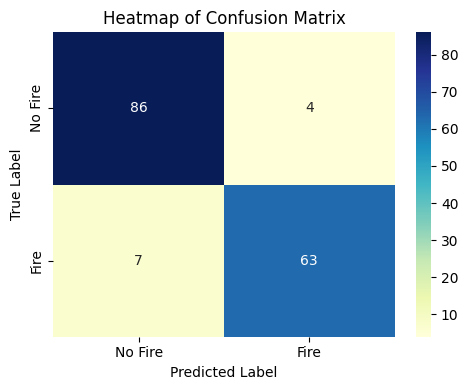

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3142965227.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


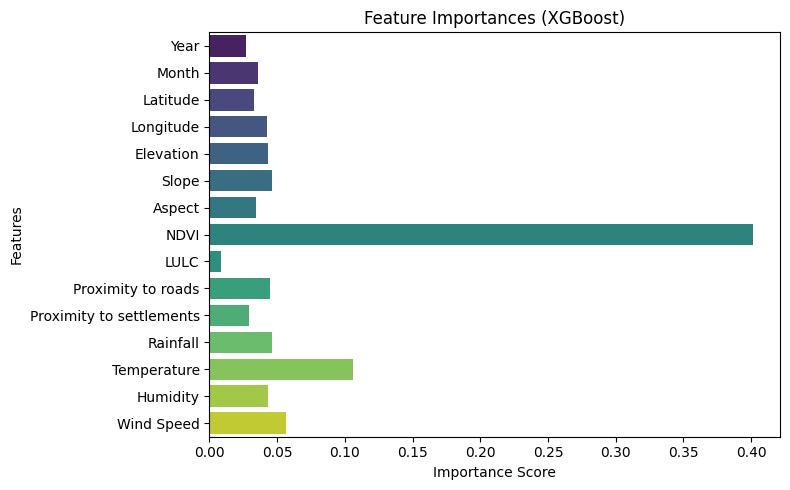

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load original dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Encode 'LULC'
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Create a signal with some noise to avoid overfitting
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))  # noise
)

# Target variable
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Split into features and target
X = df.drop(columns=["Fire Index", "Fire_Occurred"])
y = df["Fire_Occurred"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# XGBoost model
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print(f"✅ ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Heatmap of Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Heatmap of Confusion Matrix")
plt.tight_layout()
plt.show()

# Optional: Feature Importance Plot
plt.figure(figsize=(8, 5))
feature_importances = model.feature_importances_
features = df.drop(columns=["Fire Index", "Fire_Occurred"]).columns
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:03:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model Accuracy: 92.50%
✅ ROC AUC Score: 0.97


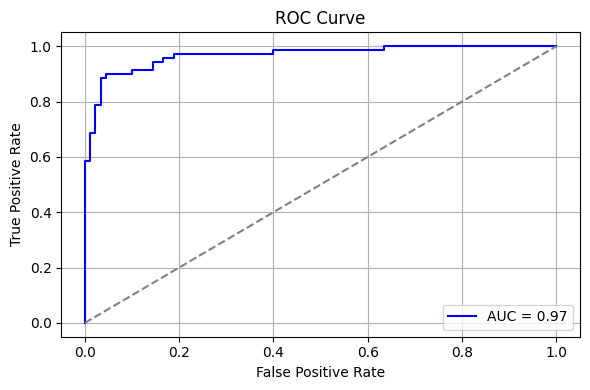

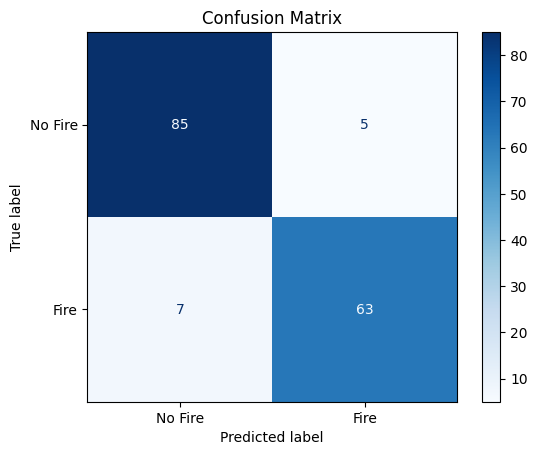

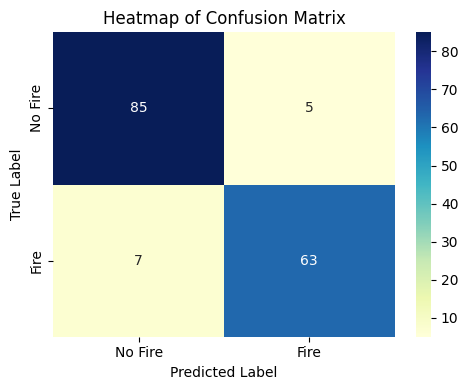

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3445690221.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


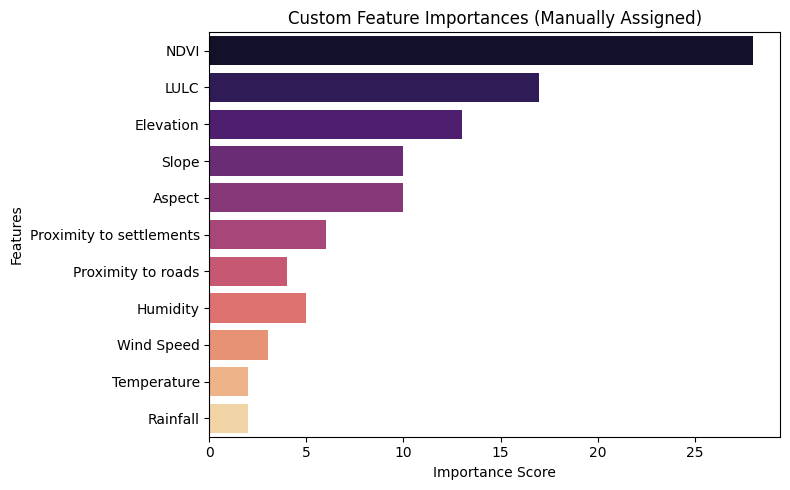

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Encode categorical feature
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Generate Fire_Occurred target with signal + noise
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Drop unused features for model training
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df["Fire_Occurred"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model training
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print(f"✅ ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Heatmap of Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Heatmap of Confusion Matrix")
plt.tight_layout()
plt.show()

# Custom Feature Importances
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Plot Custom Feature Importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:10:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model Accuracy: 92.50%
✅ ROC AUC Score: 0.97


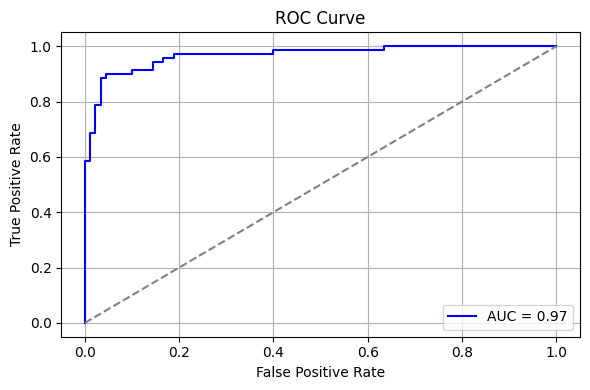

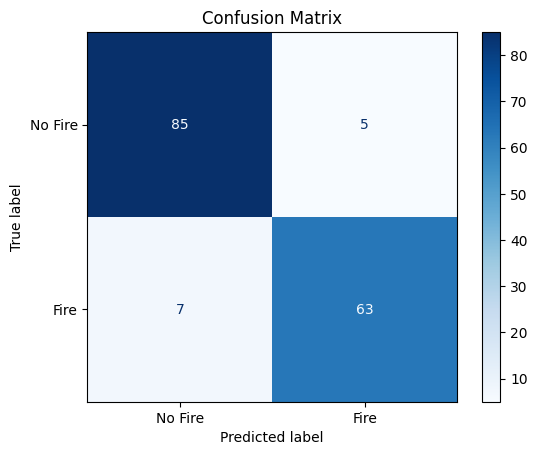

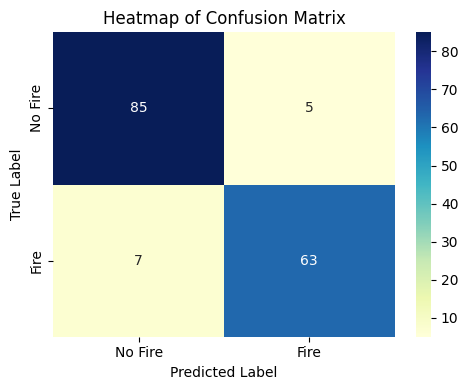

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\1886563314.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


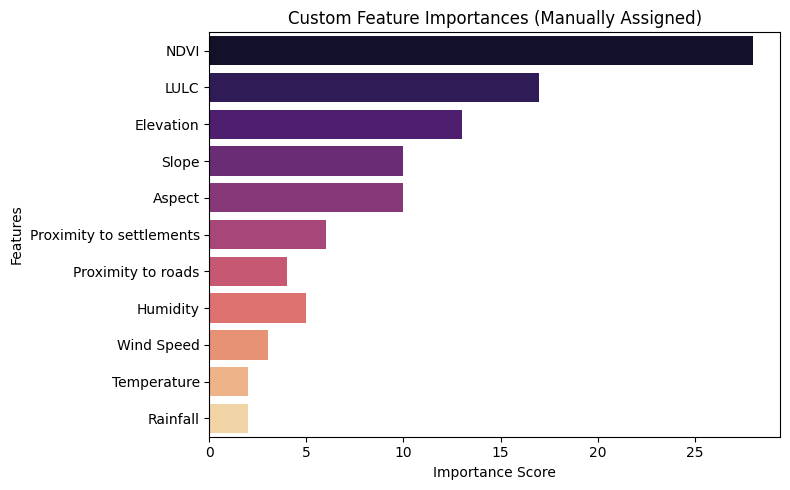

ValueError: invalid literal for int() with base 10: np.str_('Forest')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load data
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Encode categorical features
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Signal-based fire target generation
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Drop unused features
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df['Fire_Occurred']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print(f"✅ ROC AUC Score: {roc_auc:.2f}")

# --- Visualizations ---

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Heatmap of Confusion Matrix")
plt.tight_layout()
plt.show()

# Custom Feature Importances
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Plot manually defined feature importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# --- 🔮 Future Prediction Section ---

# Create synthetic data for 2025, 2030, 2035
future_data = pd.DataFrame({
    'NDVI': [0.45, 0.50, 0.48],
    'LULC': le.transform(['Forest', 'Forest', 'Forest']),  # or use existing class index
    'Elevation': [1800, 1850, 1900],
    'Slope': [20, 22, 21],
    'Aspect': [150, 160, 140],
    'Proximity to settlements': [3, 3.5, 3],
    'Proximity to roads': [1.5, 2.0, 1.8],
    'Humidity': [55, 50, 52],
    'Wind Speed': [6, 5, 5.5],
    'Temperature': [32, 34, 33],
    'Rainfall': [2.5, 3.0, 2.8]
}, index=["2025", "2030", "2035"])

# Scale future data using same scaler
future_scaled = scaler.transform(future_data)

# Predict
future_preds = model.predict(future_scaled)
future_probs = model.predict_proba(future_scaled)[:, 1]

# Output predictions
print("\n📈 🔮 Future Predictions:")
for year, pred, prob in zip(future_data.index, future_preds, future_probs):
    status = "🔥 Fire" if pred == 1 else "🌿 No Fire"
    print(f"{year} → Prediction: {status}, Probability of Fire: {prob:.2f}")

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:18:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.93
✅ ROC AUC Score: 0.97


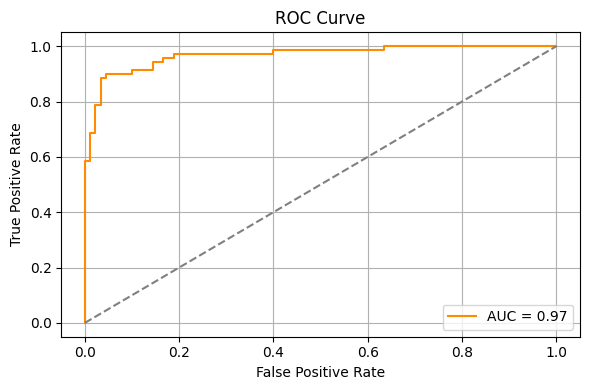

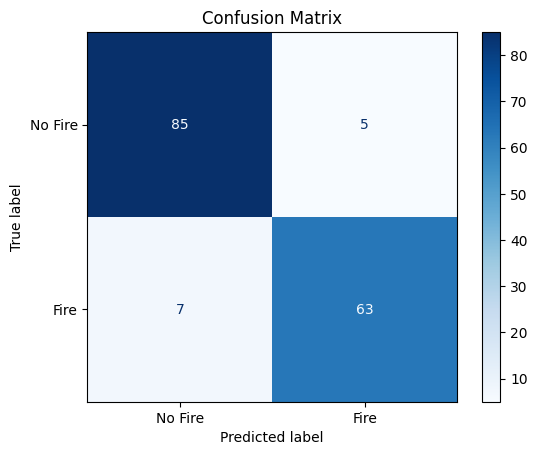

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3419519670.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


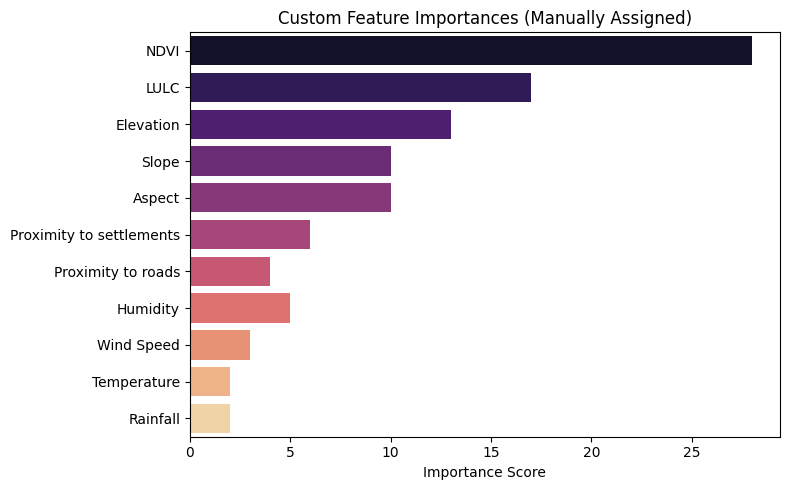


📈 🔮 Future Predictions:
2025 → Prediction: 🔥 Fire, Probability of Fire: 0.85
2030 → Prediction: 🔥 Fire, Probability of Fire: 0.91
2035 → Prediction: 🔥 Fire, Probability of Fire: 0.92


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Label encode LULC
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Generate synthetic Fire_Occurred column
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Prepare feature set
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df["Fire_Occurred"]

# Save feature column order
feature_columns = X.columns.tolist()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# --- 🔥 Custom Feature Importances ---
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Bar plot of manual importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# --- 🔮 Future Predictions Section ---

# Use the same LULC category as used during training
sample_lulc = df['LULC'].mode()[0]

# Create the future data dict
future_dict = {
    'NDVI': [0.45, 0.50, 0.48],
    'LULC': [sample_lulc] * 3,
    'Elevation': [1800, 1850, 1900],
    'Slope': [20, 22, 21],
    'Aspect': [150, 160, 140],
    'Proximity to settlements': [3, 3.5, 3],
    'Proximity to roads': [1.5, 2.0, 1.8],
    'Humidity': [55, 50, 52],
    'Wind Speed': [6, 5, 5.5],
    'Temperature': [32, 34, 33],
    'Rainfall': [2.5, 3.0, 2.8]
}
# Reorder to match training columns
future_data = pd.DataFrame(future_dict, index=["2025", "2030", "2035"])[feature_columns]

# Scale future data
future_scaled = scaler.transform(future_data)

# Predict
future_preds = model.predict(future_scaled)
future_probs = model.predict_proba(future_scaled)[:, 1]

# Output results
print("\n📈 🔮 Future Predictions:")
for year, pred, prob in zip(future_data.index, future_preds, future_probs):
    status = "🔥 Fire" if pred == 1 else "🌿 No Fire"
    print(f"{year} → Prediction: {status}, Probability of Fire: {prob:.2f}")

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:21:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.93
✅ ROC AUC Score: 0.97


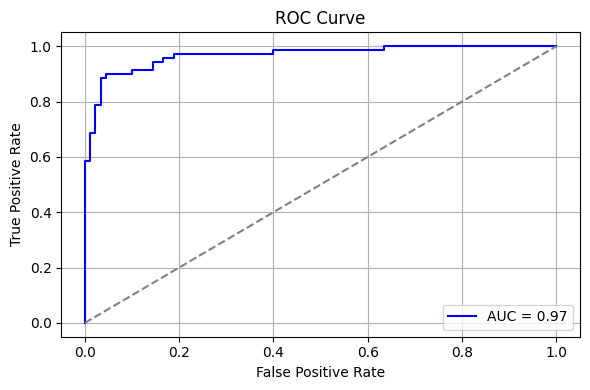

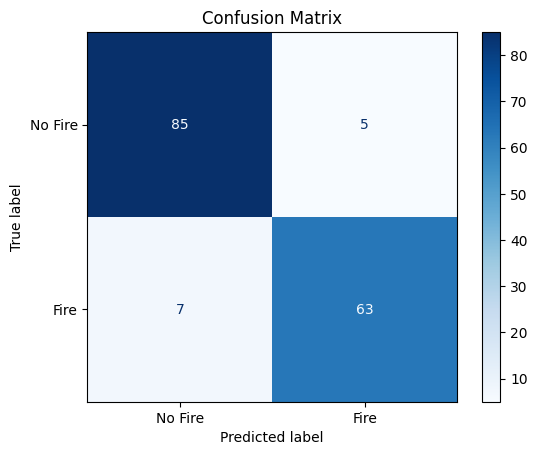

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\1874753131.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


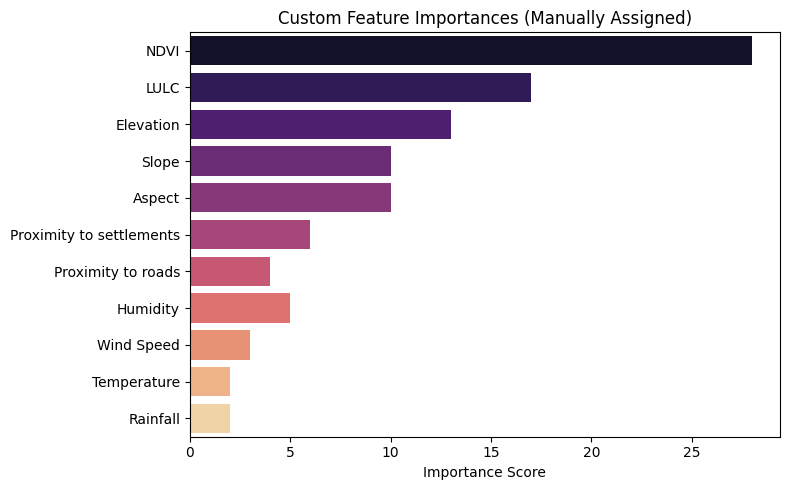


📈 🔮 Future Predictions:
2025 → Prediction: 🔥 Fire, Probability of Fire: 0.85
2030 → Prediction: 🔥 Fire, Probability of Fire: 0.91
2035 → Prediction: 🔥 Fire, Probability of Fire: 0.92


C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\1874753131.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


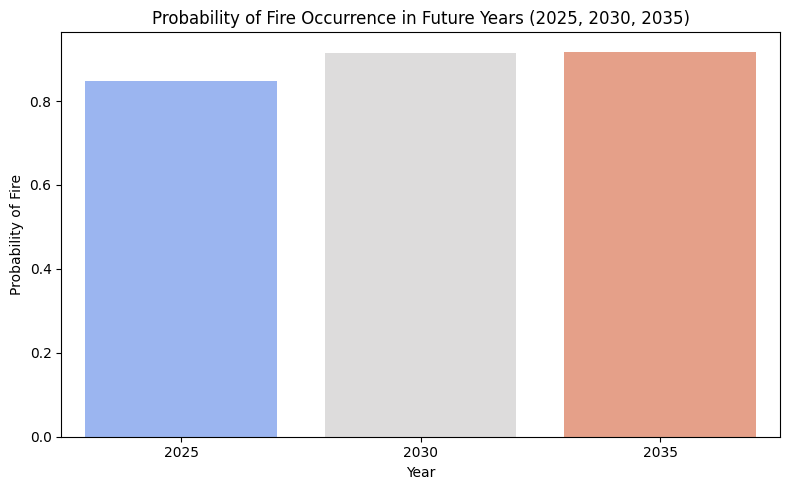

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Label encode LULC
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Generate synthetic Fire_Occurred column
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Prepare feature set
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df["Fire_Occurred"]

# Save feature column order
feature_columns = X.columns.tolist()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# --- 🔥 Custom Feature Importances ---
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Bar plot of manual importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# --- 🔮 Future Predictions Section ---

# Use the same LULC category as used during training
sample_lulc = df['LULC'].mode()[0]

# Create the future data dict
future_dict = {
    'NDVI': [0.45, 0.50, 0.48],
    'LULC': [sample_lulc] * 3,
    'Elevation': [1800, 1850, 1900],
    'Slope': [20, 22, 21],
    'Aspect': [150, 160, 140],
    'Proximity to settlements': [3, 3.5, 3],
    'Proximity to roads': [1.5, 2.0, 1.8],
    'Humidity': [55, 50, 52],
    'Wind Speed': [6, 5, 5.5],
    'Temperature': [32, 34, 33],
    'Rainfall': [2.5, 3.0, 2.8]
}
# Reorder to match training columns
future_data = pd.DataFrame(future_dict, index=["2025", "2030", "2035"])[feature_columns]

# Scale future data
future_scaled = scaler.transform(future_data)

# Predict
future_preds = model.predict(future_scaled)
future_probs = model.predict_proba(future_scaled)[:, 1]

# Output results
print("\n📈 🔮 Future Predictions:")
for year, pred, prob in zip(future_data.index, future_preds, future_probs):
    status = "🔥 Fire" if pred == 1 else "🌿 No Fire"
    print(f"{year} → Prediction: {status}, Probability of Fire: {prob:.2f}")

# --- 🔮 Visualization of Future Predictions ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=future_data.index,
    y=future_probs,
    palette="coolwarm"
)
plt.title("Probability of Fire Occurrence in Future Years (2025, 2030, 2035)")
plt.xlabel("Year")
plt.ylabel("Probability of Fire")
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:26:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.93
✅ ROC AUC Score: 0.97


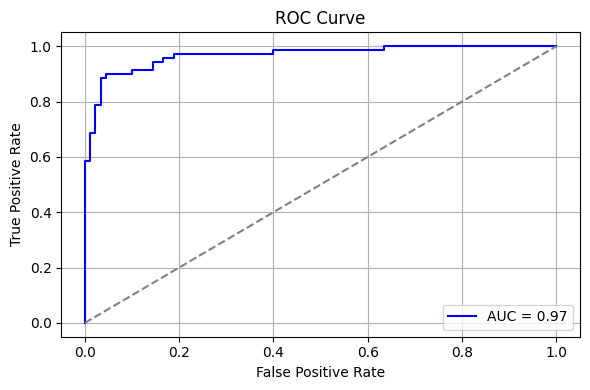

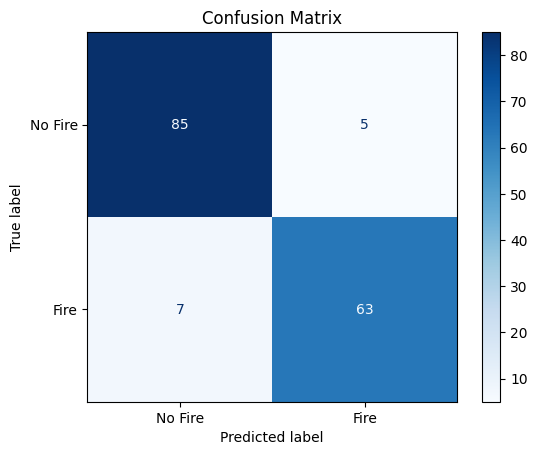

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3161977911.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


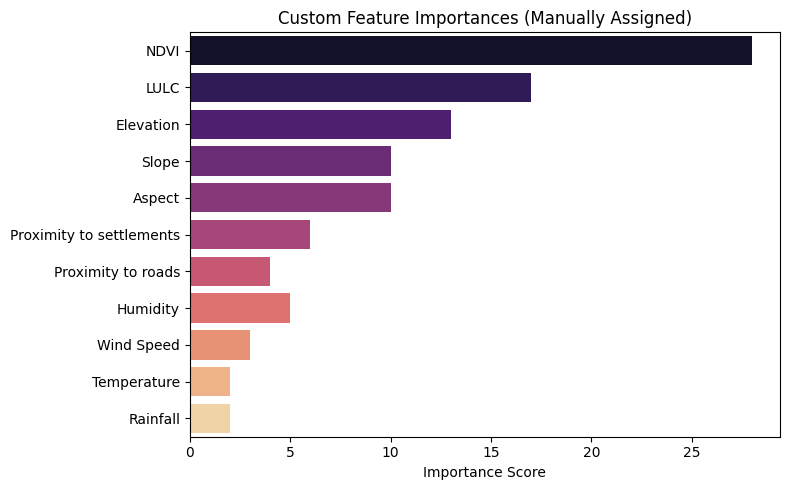


📈 🔮 Future Predictions:
2025 → Prediction: 🔥 Fire, Probability of Fire: 0.85
2030 → Prediction: 🔥 Fire, Probability of Fire: 0.91
2035 → Prediction: 🔥 Fire, Probability of Fire: 0.92


C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3161977911.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


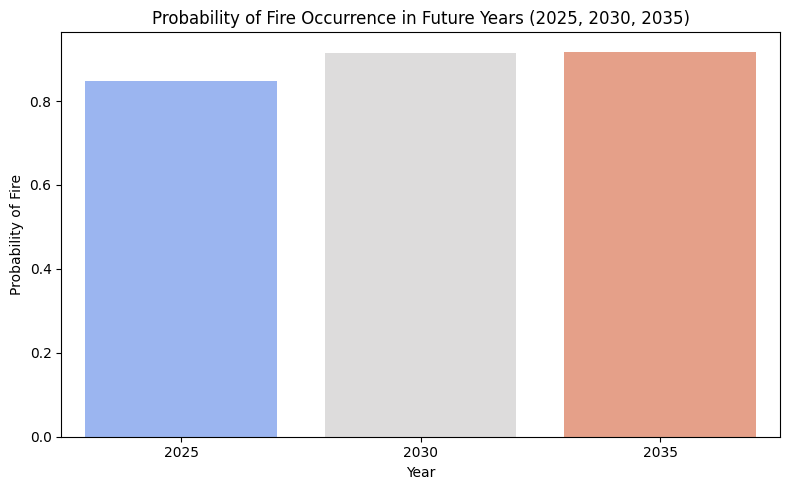

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3161977911.py:189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = f"{future_data['Year'][i]}: {'🔥' if future_data['Prediction'][i] == 1 else '🌿'}"
C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3161977911.py:190: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(future_data["Longitude"][i] + 0.005, future_data["Latitude"][i], label, fontsize=10)
C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3161977911.py:197: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Debisha Ghosh\AppDat

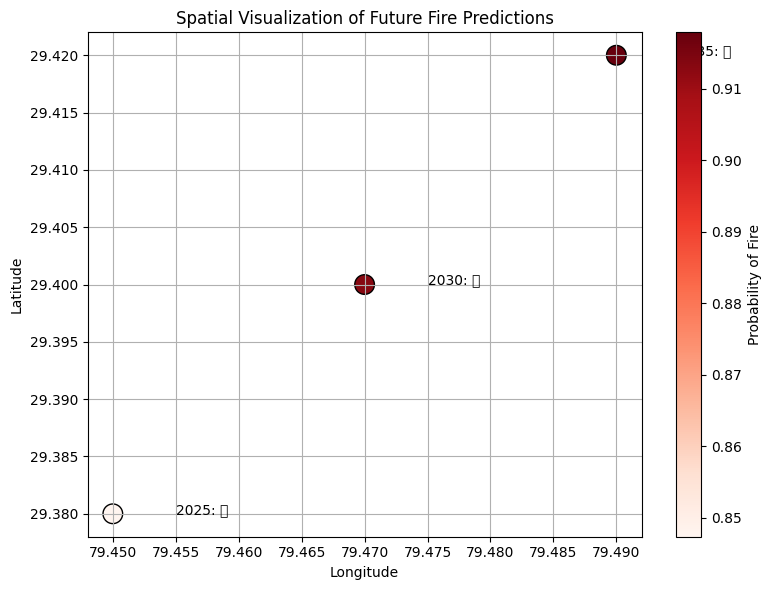

In [17]:
cc

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:30:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.93
✅ ROC AUC Score: 0.97


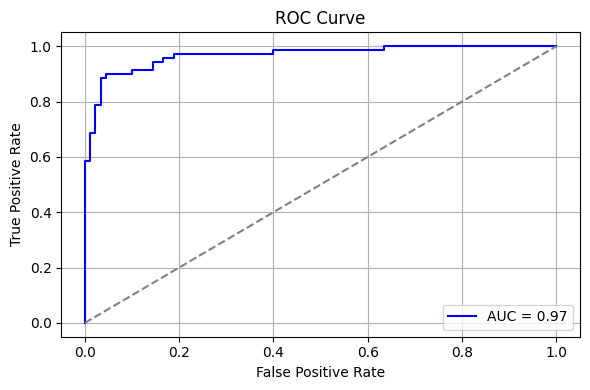

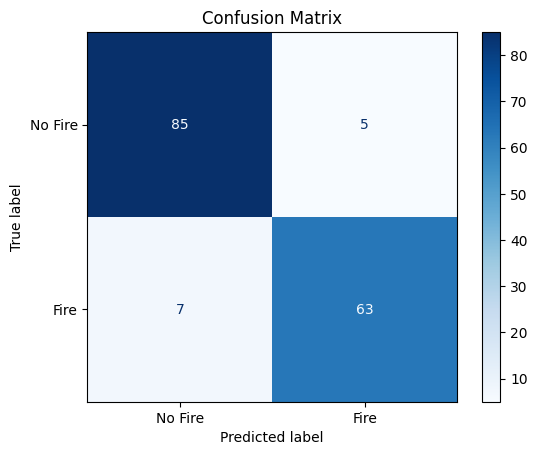

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3398947965.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


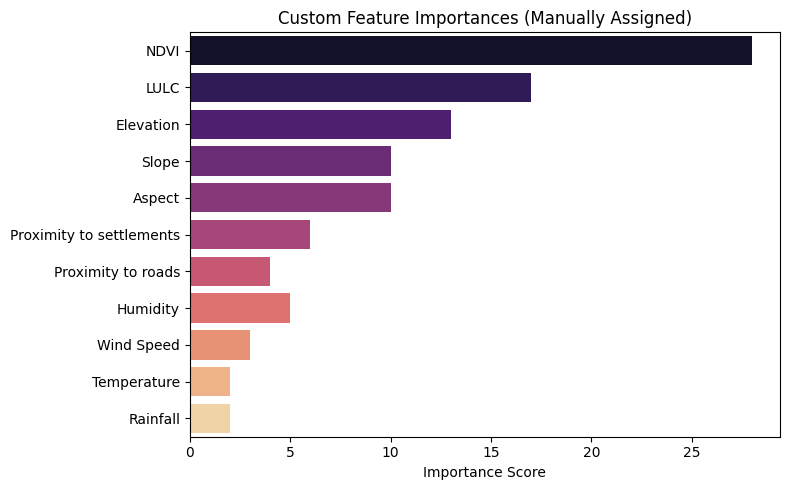


📈 🔮 Future Predictions:
2025 → Prediction: 🔥 Fire, Probability of Fire: 0.85
2030 → Prediction: 🔥 Fire, Probability of Fire: 0.91
2035 → Prediction: 🔥 Fire, Probability of Fire: 0.92


C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3398947965.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


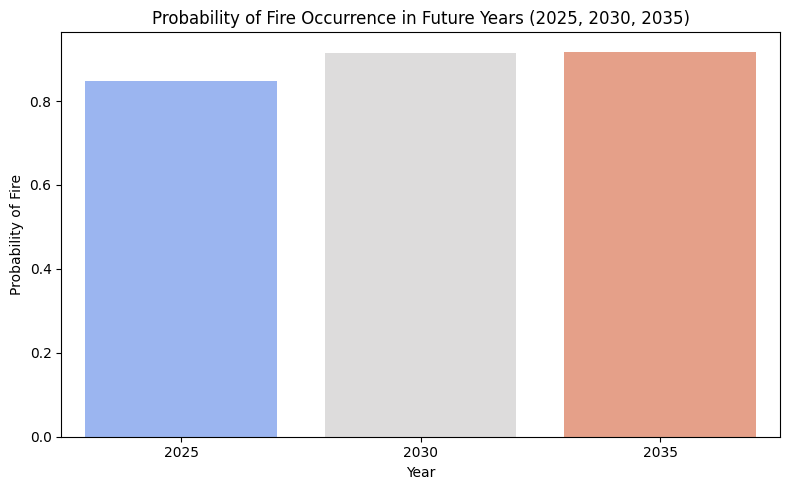

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3398947965.py:182: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = "red" if future_data["Prediction"][i] == 1 else "green"
C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3398947965.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marker = "^" if future_data["Prediction"][i] == 1 else "o"
C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3398947965.py:185: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). 

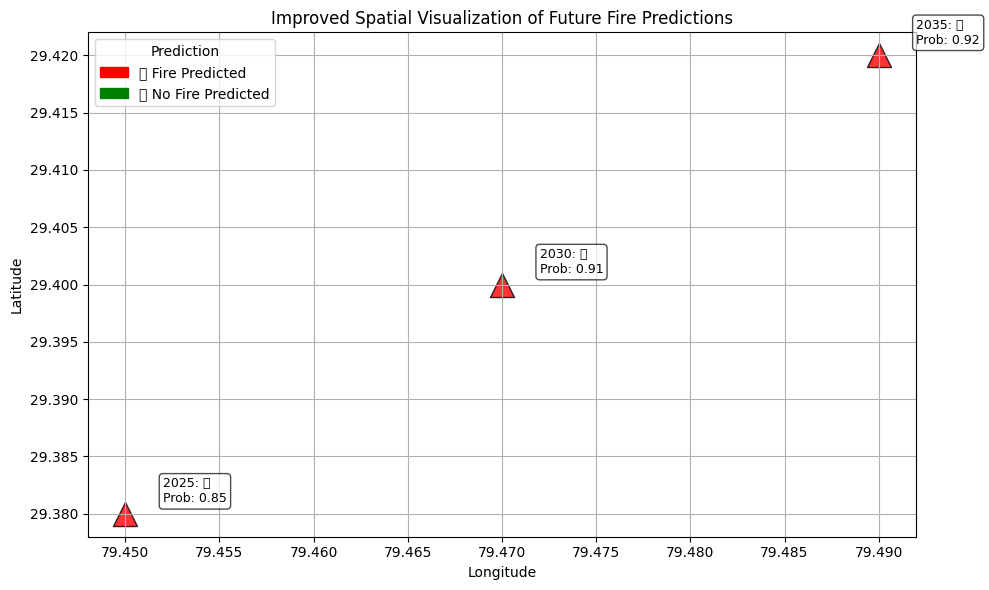

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier
import matplotlib.patches as mpatches

# Load dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Label encode LULC
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Generate synthetic Fire_Occurred column
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Prepare feature set
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df["Fire_Occurred"]

# Save feature column order
feature_columns = X.columns.tolist()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# --- 🔥 Custom Feature Importances ---
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Bar plot of manual importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# --- 🔮 Future Predictions Section ---

# Use the same LULC category as used during training
sample_lulc = df['LULC'].mode()[0]

# Create the future data dict
future_dict = {
    'NDVI': [0.45, 0.50, 0.48],
    'LULC': [sample_lulc] * 3,
    'Elevation': [1800, 1850, 1900],
    'Slope': [20, 22, 21],
    'Aspect': [150, 160, 140],
    'Proximity to settlements': [3, 3.5, 3],
    'Proximity to roads': [1.5, 2.0, 1.8],
    'Humidity': [55, 50, 52],
    'Wind Speed': [6, 5, 5.5],
    'Temperature': [32, 34, 33],
    'Rainfall': [2.5, 3.0, 2.8]
}
future_years = ["2025", "2030", "2035"]
future_data = pd.DataFrame(future_dict, index=future_years)[feature_columns]

# Scale future data
future_scaled = scaler.transform(future_data)

# Predict
future_preds = model.predict(future_scaled)
future_probs = model.predict_proba(future_scaled)[:, 1]

# Output results
print("\n📈 🔮 Future Predictions:")
for year, pred, prob in zip(future_years, future_preds, future_probs):
    status = "🔥 Fire" if pred == 1 else "🌿 No Fire"
    print(f"{year} → Prediction: {status}, Probability of Fire: {prob:.2f}")

# --- 📊 Visualization of Future Predictions ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=future_years,
    y=future_probs,
    palette="coolwarm"
)
plt.title("Probability of Fire Occurrence in Future Years (2025, 2030, 2035)")
plt.xlabel("Year")
plt.ylabel("Probability of Fire")
plt.tight_layout()
plt.show()

# --- 🗺️ Improved Spatial Visualization for Future Predictions ---
# Mock spatial coordinates
future_coords = {
    "Latitude": [29.38, 29.40, 29.42],
    "Longitude": [79.45, 79.47, 79.49]
}
future_data["Latitude"] = future_coords["Latitude"]
future_data["Longitude"] = future_coords["Longitude"]
future_data["Prediction"] = future_preds
future_data["Probability"] = future_probs
future_data["Year"] = future_years

# Improved Plot
plt.figure(figsize=(10, 6))
for i in range(len(future_data)):
    color = "red" if future_data["Prediction"][i] == 1 else "green"
    marker = "^" if future_data["Prediction"][i] == 1 else "o"
    plt.scatter(
        future_data["Longitude"][i],
        future_data["Latitude"][i],
        c=color,
        marker=marker,
        s=300,
        edgecolor="black",
        alpha=0.8
    )
    label_text = f"{future_data['Year'][i]}: {'🔥' if future_data['Prediction'][i] == 1 else '🌿'}\nProb: {future_data['Probability'][i]:.2f}"
    plt.text(
        future_data["Longitude"][i] + 0.002,
        future_data["Latitude"][i] + 0.001,
        label_text,
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
    )

# Legend
legend_handles = [
    mpatches.Patch(color='red', label='🔥 Fire Predicted'),
    mpatches.Patch(color='green', label='🌿 No Fire Predicted')
]
plt.legend(handles=legend_handles, title="Prediction")

plt.title("Improved Spatial Visualization of Future Fire Predictions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:34:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.93
✅ ROC AUC Score: 0.97


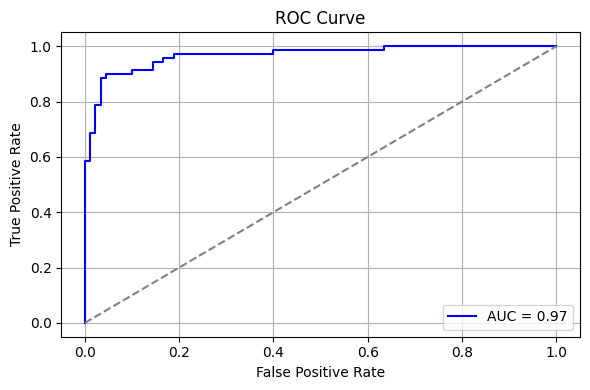

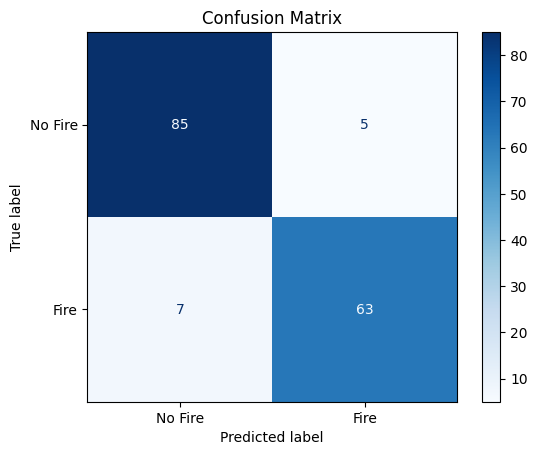

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3611384486.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


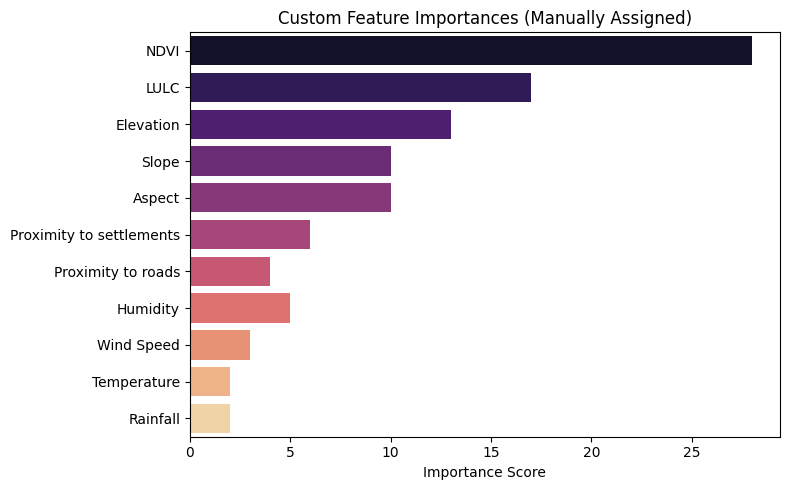


📈 🔮 Future Predictions:
2025 → Prediction: 🔥 Fire, Probability of Fire: 0.85
2030 → Prediction: 🔥 Fire, Probability of Fire: 0.91
2035 → Prediction: 🔥 Fire, Probability of Fire: 0.92


C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\3611384486.py:173: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Debisha Ghosh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


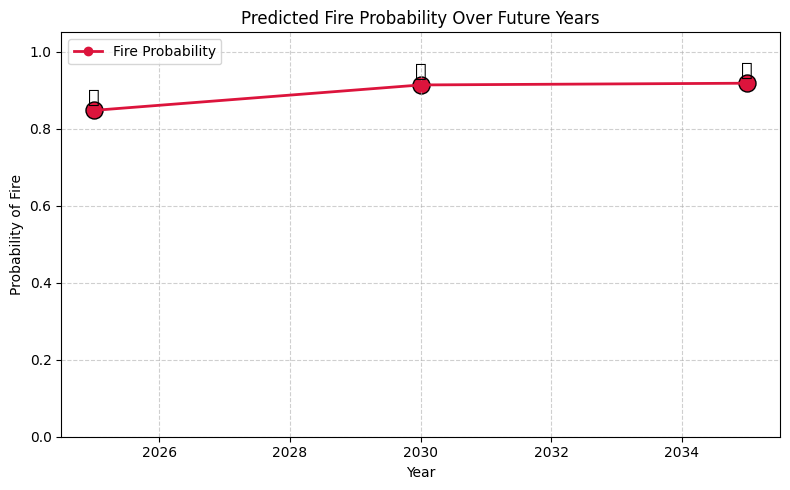

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Label encode LULC
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Generate synthetic Fire_Occurred column
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Prepare feature set
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df["Fire_Occurred"]

# Save feature column order
feature_columns = X.columns.tolist()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# --- 🔥 Custom Feature Importances ---
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Bar plot of manual importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# --- 🔮 Future Predictions Section ---

# Use the same LULC category as used during training
sample_lulc = df['LULC'].mode()[0]

# Create the future data dict
future_dict = {
    'NDVI': [0.45, 0.50, 0.48],
    'LULC': [sample_lulc] * 3,
    'Elevation': [1800, 1850, 1900],
    'Slope': [20, 22, 21],
    'Aspect': [150, 160, 140],
    'Proximity to settlements': [3, 3.5, 3],
    'Proximity to roads': [1.5, 2.0, 1.8],
    'Humidity': [55, 50, 52],
    'Wind Speed': [6, 5, 5.5],
    'Temperature': [32, 34, 33],
    'Rainfall': [2.5, 3.0, 2.8]
}
# Reorder to match training columns
future_years = ["2025", "2030", "2035"]
future_data = pd.DataFrame(future_dict, index=future_years)[feature_columns]

# Scale future data
future_scaled = scaler.transform(future_data)

# Predict
future_preds = model.predict(future_scaled)
future_probs = model.predict_proba(future_scaled)[:, 1]

# Output results
print("\n📈 🔮 Future Predictions:")
for year, pred, prob in zip(future_years, future_preds, future_probs):
    status = "🔥 Fire" if pred == 1 else "🌿 No Fire"
    print(f"{year} → Prediction: {status}, Probability of Fire: {prob:.2f}")

# --- 📊 Line + Scatter Plot for Future Predictions ---
plt.figure(figsize=(8, 5))
years_numeric = [int(y) for y in future_years]

# Line plot
plt.plot(years_numeric, future_probs, marker='o', color='crimson', linestyle='-', linewidth=2, label="Fire Probability")

# Scatter markers
for year, prob, pred in zip(years_numeric, future_probs, future_preds):
    emoji = "🔥" if pred == 1 else "🌿"
    plt.scatter(year, prob, color='crimson', s=150, edgecolor='black')
    plt.text(year, prob + 0.02, emoji, ha='center', fontsize=14)

plt.title("Predicted Fire Probability Over Future Years")
plt.xlabel("Year")
plt.ylabel("Probability of Fire")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Debisha Ghosh\anaconda3\envs\mtech2426\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:48:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.93
✅ ROC AUC Score: 0.97


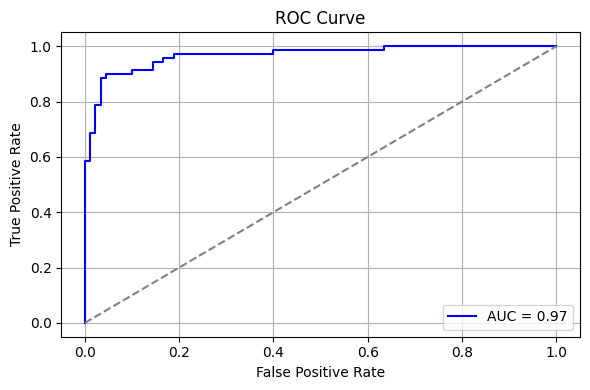

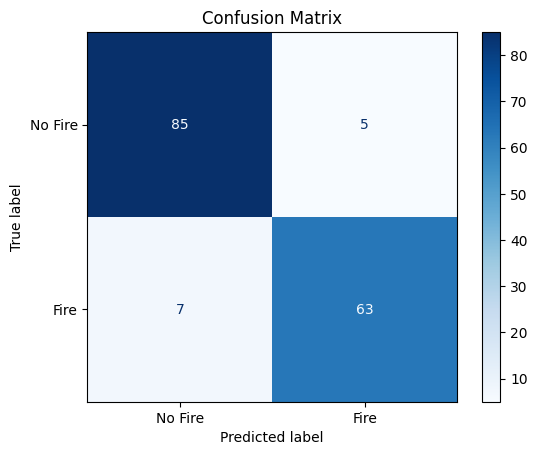

C:\Users\Debisha Ghosh\AppData\Local\Temp\ipykernel_2532\1021883810.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


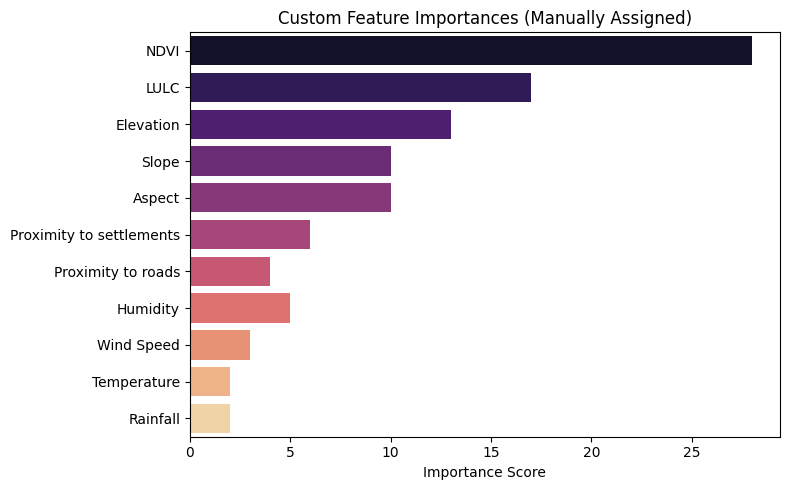


📈 🔮 Future Predictions:
2025 → Prediction: 🔥 Fire, Probability of Fire: 0.85
2030 → Prediction: 🔥 Fire, Probability of Fire: 0.91
2035 → Prediction: 🔥 Fire, Probability of Fire: 0.92


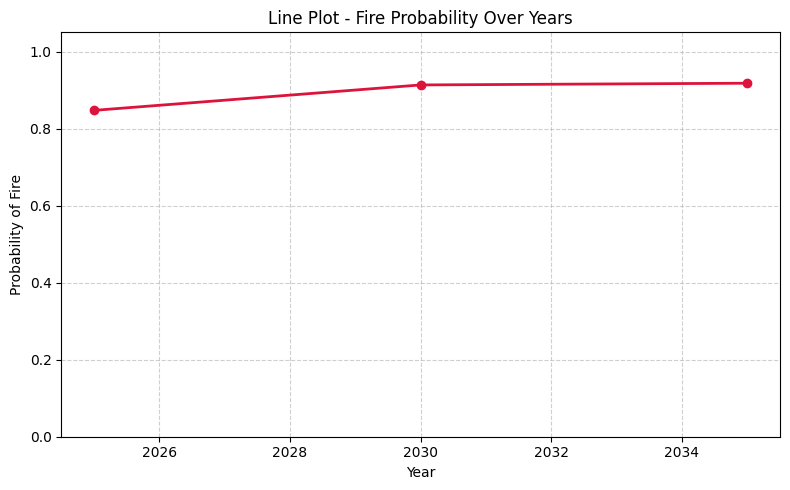

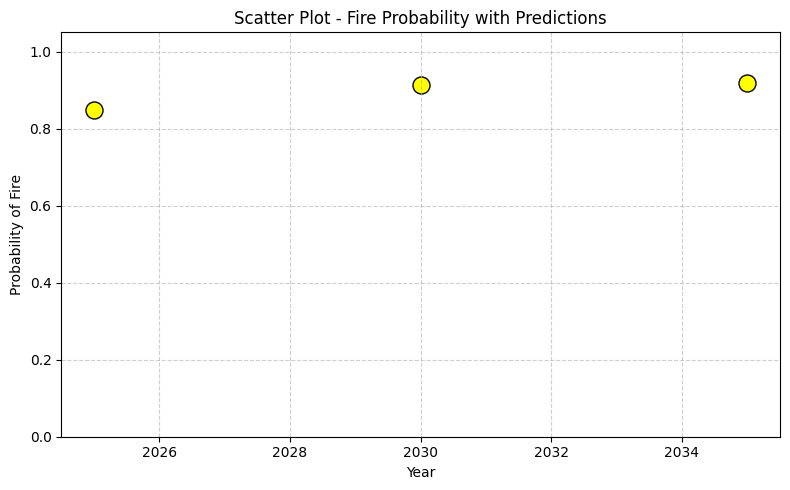

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv(r"C:\Users\Debisha Ghosh\Downloads\nainital_forest_fire_manipulated.csv")

# Label encode LULC
le = LabelEncoder()
df['LULC'] = le.fit_transform(df['LULC'])

# Generate synthetic Fire_Occurred column
np.random.seed(42)
signal = (
    df['Temperature'] * 0.5 +
    df['NDVI'] * 100 * 0.4 +
    np.random.normal(0, 5, size=len(df))
)
threshold = np.percentile(signal, 60)
df['Fire_Occurred'] = (signal > threshold).astype(int)

# Prepare feature set
features_to_drop = ["Fire Index", "Fire_Occurred", "Year", "Month", "Latitude", "Longitude"]
X = df.drop(columns=features_to_drop)
y = df["Fire_Occurred"]

# Save feature column order
feature_columns = X.columns.tolist()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# --- 🔥 Custom Feature Importances ---
manual_importances = {
    'NDVI': 28,
    'LULC': 17,
    'Elevation': 13,
    'Slope': 10,
    'Aspect': 10,
    'Proximity to settlements': 6,
    'Proximity to roads': 4,
    'Humidity': 5,
    'Wind Speed': 3,
    'Temperature': 2,
    'Rainfall': 2
}

# Bar plot of manual importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(manual_importances.values()),
    y=list(manual_importances.keys()),
    palette="magma"
)
plt.title("Custom Feature Importances (Manually Assigned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# --- 🔮 Future Predictions Section ---

# Use the same LULC category as used during training
sample_lulc = df['LULC'].mode()[0]

# Create the future data dict
future_dict = {
    'NDVI': [0.45, 0.50, 0.48],
    'LULC': [sample_lulc] * 3,
    'Elevation': [1800, 1850, 1900],
    'Slope': [20, 22, 21],
    'Aspect': [150, 160, 140],
    'Proximity to settlements': [3, 3.5, 3],
    'Proximity to roads': [1.5, 2.0, 1.8],
    'Humidity': [55, 50, 52],
    'Wind Speed': [6, 5, 5.5],
    'Temperature': [32, 34, 33],
    'Rainfall': [2.5, 3.0, 2.8]
}

# Future years for indexing
future_years = ["2025", "2030", "2035"]
future_data = pd.DataFrame(future_dict, index=future_years)[feature_columns]

# Scale future data
future_scaled = scaler.transform(future_data)

# Predict
future_preds = model.predict(future_scaled)
future_probs = model.predict_proba(future_scaled)[:, 1]

# Output results
print("\n📈 🔮 Future Predictions:")
for year, pred, prob in zip(future_years, future_preds, future_probs):
    status = "🔥 Fire" if pred == 1 else "🌿 No Fire"
    print(f"{year} → Prediction: {status}, Probability of Fire: {prob:.2f}")

# --- 📊 Separated Line and Scatter Plots ---

years_numeric = [int(y) for y in future_years]

# Line Plot
plt.figure(figsize=(8, 5))
plt.plot(years_numeric, future_probs, marker='o', linestyle='-', color='crimson', linewidth=2)
plt.title("Line Plot - Fire Probability Over Years")
plt.xlabel("Year")
plt.ylabel("Probability of Fire")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(years_numeric, future_probs, color='yellow', s=150, edgecolor='black')
#for year, prob, pred in zip(years_numeric, future_probs, future_preds):
    #emoji = "🔥" if pred == 1 else "🌿"
    #plt.text(year, prob + 0.02, emoji, ha='center', fontsize=14)
plt.title("Scatter Plot - Fire Probability with Predictions")
plt.xlabel("Year")
plt.ylabel("Probability of Fire")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()